In [1]:
import sys
sys.path.insert(0, '/10 A KAI 2/Week6/Credit_Scoring/')
import pandas as pd

In [2]:
from Script.WOE import WOEAnalysis

In [3]:
df = pd.read_csv('../Data/data_v2.csv', index_col=0)

In [4]:
df.columns

Index(['CustomerId', 'Frequency', 'MonetaryValue', 'Recency', 'RFMS_Score', 'Total_Credit_Amount', 'Total_Debit_Amount', 'Total_Transaction_amount', 'Average_Transaction_Amount', 'Transaction_Count', 'Total_Unique_Account_Count', 'FraudResult', 'ChannelId_ChannelId_1', 'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3',
       'ChannelId_ChannelId_5', 'ProductCategory_airtime', 'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_other', 'ProductCategory_ticket', 'ProductCategory_transport', 'ProductCategory_tv', 'ProductCategory_utility_bill',
       'Standard_Deviation_Transaction_Amount', 'CreditRiskLabel'],
      dtype='object')

##### Removing attributes which was used to calaculate the proxy label because it is redendent on the data

In [5]:
df = df.drop(['RFMS_Score', 'Frequency', 'MonetaryValue', 'Recency'], axis=1)

In [6]:
df.columns

Index(['CustomerId', 'Total_Credit_Amount', 'Total_Debit_Amount', 'Total_Transaction_amount', 'Average_Transaction_Amount', 'Transaction_Count', 'Total_Unique_Account_Count', 'FraudResult', 'ChannelId_ChannelId_1', 'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5', 'ProductCategory_airtime',
       'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_other', 'ProductCategory_ticket', 'ProductCategory_transport', 'ProductCategory_tv', 'ProductCategory_utility_bill', 'Standard_Deviation_Transaction_Amount', 'CreditRiskLabel'],
      dtype='object')

In [7]:
woe = WOEAnalysis(df, 'CreditRiskLabel')

In [8]:
woe.woe_num()


Scaled Numerical Features:
   Total_Credit_Amount  Total_Debit_Amount  Total_Transaction_amount  Average_Transaction_Amount  Transaction_Count  Total_Unique_Account_Count  FraudResult  ChannelId_ChannelId_1  ChannelId_ChannelId_2  ChannelId_ChannelId_3  ChannelId_ChannelId_5  ProductCategory_airtime  ProductCategory_data_bundles  \
0            -0.826640            0.377591                 -0.728235                    1.043121          -0.839070                   -1.356587          0.0                    0.0              -0.674625              -0.884094                    0.0                -0.709758                           0.0   
1            -0.826640            0.377591                 -0.728235                    1.043121          -0.839070                   -1.356587          0.0                    0.0              -0.674625              -0.884094                    0.0                -0.709758                           0.0   
2            -0.481362           -0.155651          

{'Total_Credit_Amount': [-0.5526101046843596,
  -0.48410273198448267,
  -0.38504107106046076,
  -0.14156586848509853,
  0.625716705753522,
  2.1462292794057007],
 'Total_Debit_Amount': [-0.7211089861321774,
  -0.6052400407651802,
  -0.5944641177540596,
  -0.5822439988754693,
  0.9108323441086564,
  2.321700614636811],
 'Total_Transaction_amount': [-0.5828033414338817,
  -0.47130601166127384,
  -0.23794937201219088,
  -0.15038761031576797,
  0.380679019101153,
  1.6229047040677071,
  2.1246426880444425],
 'Average_Transaction_Amount': [-0.9330649521607465,
  -0.8891360523679499,
  -0.6700035452430442,
  0.0754565724528974,
  2.333150488710752],
 'Transaction_Count': [-0.774920604046318,
  -0.6466214690180534,
  -0.5183223339897888,
  -0.39002319896152415,
  -0.1975744964191273,
  -0.06927536139086275,
  0.2514724761797986,
  0.5080707462363278,
  1.1495664213776504,
  1.662762961490709,
  2.1118099340896346],
 'Total_Unique_Account_Count': [-1.356587266498692,
  0.909640211732605,
  3.1

##### Bine each columns 
##### Purpose: This function calculates optimal bin breaks for numerical features using monotonic binning. The breaks are used for further calculations such as Weight of Evidence (WoE) and Information Value (IV) in the context of credit scoring.

[INFO] creating woe binning ...
Adjusted Binning Results:
{'Total_Transaction_amount':                    variable                                          bin  count  count_distr  good  bad   badprob       woe    bin_iv  total_iv                breaks  is_special_values
0  Total_Transaction_amount                   [-inf,-0.5828033414338817)   1534     0.409941  1457   77  0.050196 -2.941398  2.170787  3.709666   -0.5828033414338817              False
1  Total_Transaction_amount   [-0.5828033414338817,-0.47130601166127384)    229     0.061197   113  116  0.506550  0.025133  0.000039  3.709666  -0.47130601166127384              False
2  Total_Transaction_amount  [-0.47130601166127384,-0.23794937201219088)    479     0.128006   145  334  0.697286  0.833338  0.084066  3.709666  -0.23794937201219088              False
3  Total_Transaction_amount  [-0.23794937201219088,-0.15038761031576797)     94     0.025120    18   76  0.808511  1.439293  0.044579  3.709666  -0.15038761031576797        

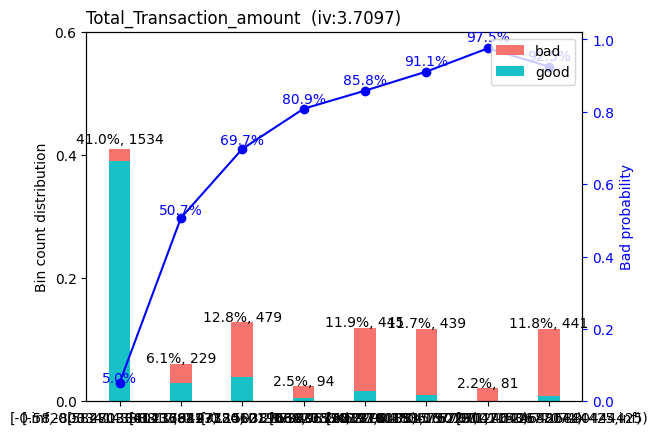

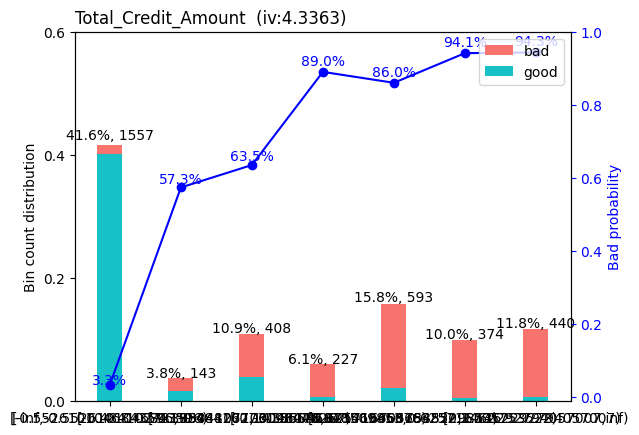

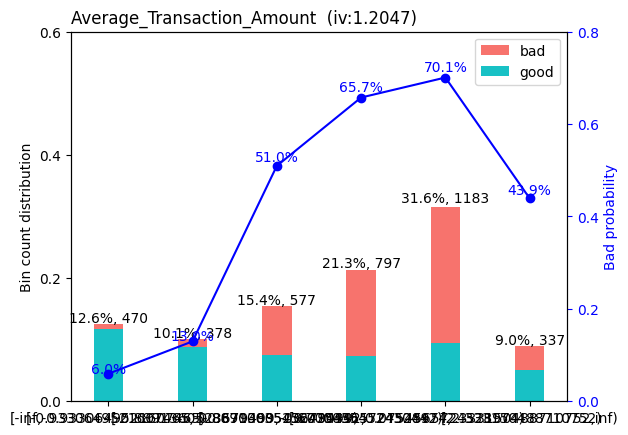

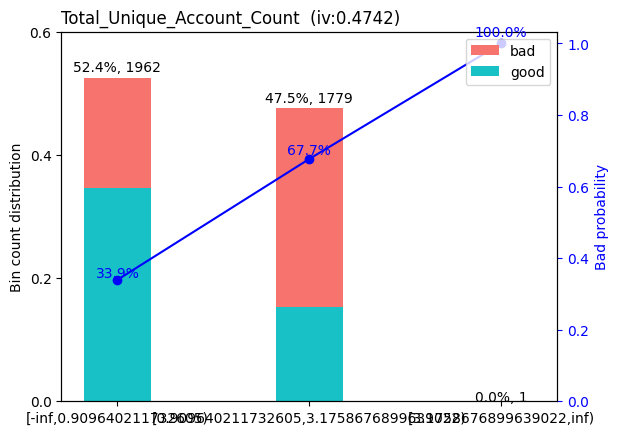

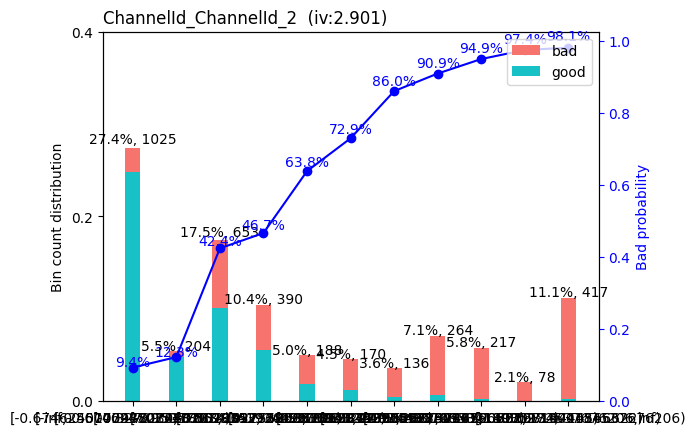

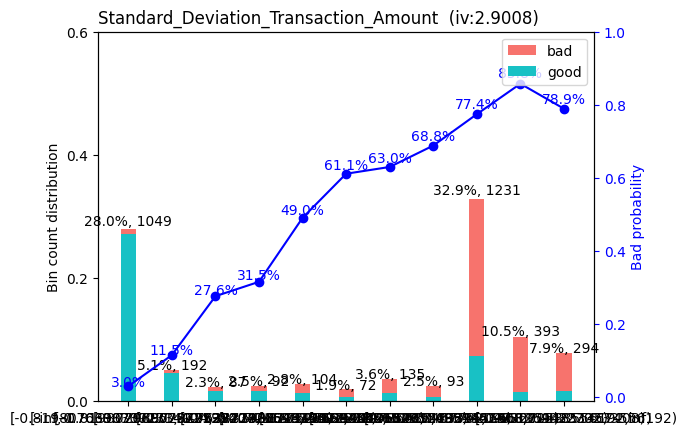

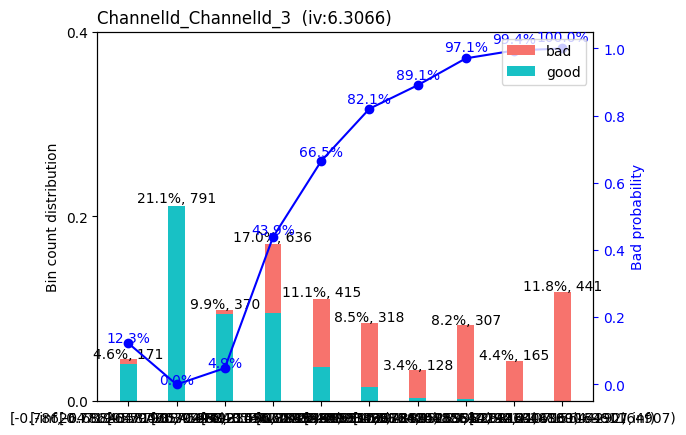

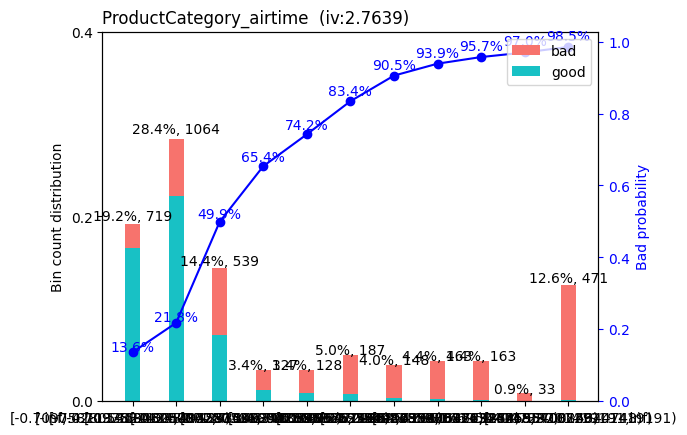

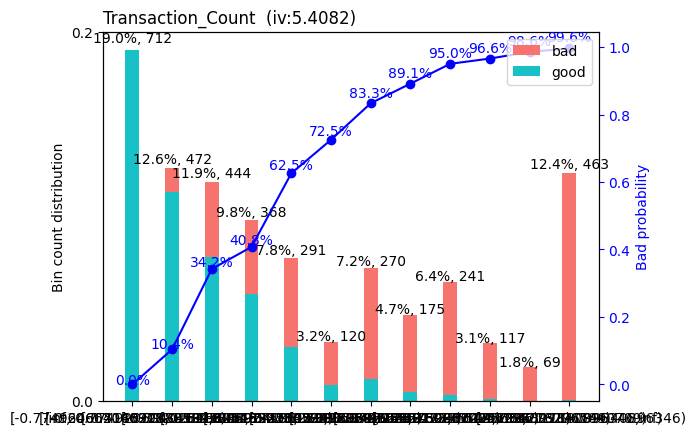

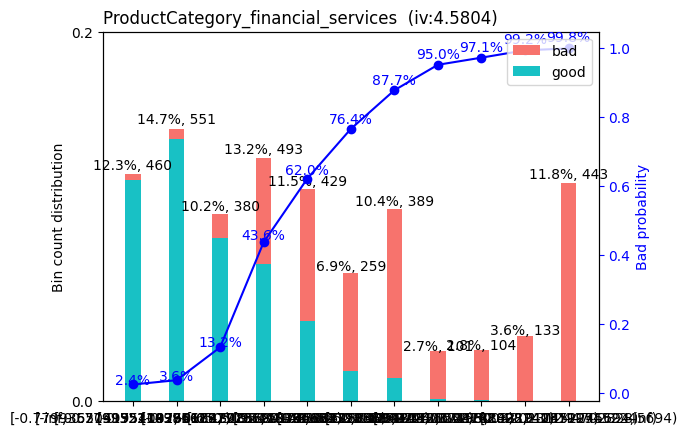

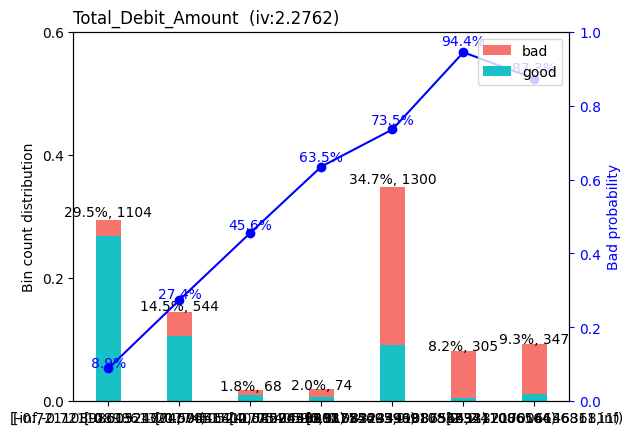

In [9]:
woe.adjust_woe()

##### The adjust_woe function in your WOEAnalysis class performs two primary tasks: it adjusts the weights of evidence (WoE) calculations based on the previously computed breaks and visualizes these WoE values.

In [10]:
train_woe = woe.woeval(df)
train_woe

[INFO] creating woe binning ...
[INFO] converting into woe values ...


,ChannelId_ChannelId_1,CreditRiskLabel,ProductCategory_data_bundles,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ProductCategory_other,ChannelId_ChannelId_5,CustomerId,ProductCategory_ticket,FraudResult,ProductCategory_movies,Total_Transaction_amount_woe,Total_Credit_Amount_woe,Average_Transaction_Amount_woe,Total_Unique_Account_Count_woe,ChannelId_ChannelId_2_woe,Standard_Deviation_Transaction_Amount_woe,ChannelId_ChannelId_3_woe,ProductCategory_airtime_woe,Transaction_Count_woe,ProductCategory_financial_services_woe,Total_Debit_Amount_woe
0,0.0,Bad,0.0,0.0,0.0,0.0,0.0,0.0,CustomerId_1,0.0,0.0,0.0,-2.941398,-3.366373,0.849854,-0.666336,-1.969579,-3.492677,-1.967181,-1.278164,-6.674988,-3.710197,1.021047
1,0.0,Bad,0.0,0.0,0.0,0.0,0.0,0.0,CustomerId_10,0.0,0.0,0.0,-2.941398,-3.366373,0.849854,-0.666336,-1.969579,-3.492677,-1.967181,-1.278164,-6.674988,-3.710197,1.021047
2,0.0,Good,0.0,0.0,0.0,0.0,0.0,0.0,CustomerId_1001,0.0,0.0,0.0,0.025133,0.551813,0.849854,-0.666336,-0.306641,1.230925,-0.247592,-1.278164,-0.654423,-0.258052,1.021047
3,0.0,Bad,0.0,0.0,0.0,0.0,0.0,0.0,CustomerId_1002,0.0,0.0,0.0,-2.941398,-3.366373,-2.760174,-0.666336,1.816666,-3.492677,0.684858,0.633582,0.967851,1.176324,-0.976008
4,0.0,Good,0.0,0.0,0.0,0.0,0.0,0.0,CustomerId_1003,0.0,0.0,0.0,0.833338,0.551813,0.650951,0.741018,-0.306641,1.230925,-0.247592,-0.004780,-0.375409,-0.258052,1.021047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737,0.0,Good,0.0,0.0,0.0,0.0,0.0,0.0,CustomerId_992,0.0,0.0,0.0,0.833338,0.551813,0.650951,0.741018,-0.306641,1.230925,-0.247592,-0.004780,-0.375409,-0.258052,1.021047
3738,0.0,Good,0.0,0.0,0.0,0.0,0.0,0.0,CustomerId_993,0.0,0.0,0.0,0.833338,0.551813,0.849854,0.741018,-0.306641,1.230925,-0.247592,-1.278164,-0.654423,-0.258052,1.021047
3739,0.0,Good,0.0,0.0,0.0,0.0,0.0,0.0,CustomerId_994,0.0,0.0,0.0,3.675232,2.771520,0.849854,-0.666336,3.636517,1.793662,6.193337,4.192905,4.217958,6.090241,1.928474
3740,0.0,Good,0.0,0.0,0.0,0.0,0.0,0.0,CustomerId_996,0.0,0.0,0.0,2.326834,2.771520,0.849854,0.741018,-0.306641,1.230925,3.498800,-1.278164,1.607888,3.515439,1.021047


In [11]:
# Merge WoE values with original DataFrame
df_merged = pd.concat([df.reset_index(drop=True), train_woe.reset_index(drop=True)], axis=1)

In [12]:
df_merged.dtypes

CustomerId                                    object
Total_Credit_Amount                          float64
Total_Debit_Amount                           float64
Total_Transaction_amount                     float64
Average_Transaction_Amount                   float64
Transaction_Count                            float64
Total_Unique_Account_Count                   float64
FraudResult                                  float64
ChannelId_ChannelId_1                        float64
ChannelId_ChannelId_2                        float64
ChannelId_ChannelId_3                        float64
ChannelId_ChannelId_5                        float64
ProductCategory_airtime                      float64
ProductCategory_data_bundles                 float64
ProductCategory_financial_services           float64
ProductCategory_movies                       float64
ProductCategory_other                        float64
ProductCategory_ticket                       float64
ProductCategory_transport                    f

In [13]:
# Calculate IV for the features
df_merge, iv_results = woe.calculate_iv(df_merged, y='CreditRiskLabel') 
print("Information Value (IV) Results:")
iv_results

Information Value (IV) Results:


,variable,info_value
30,ChannelId_ChannelId_3_woe,6.317878
4,ChannelId_ChannelId_3,6.150907
27,Transaction_Count,5.545195
21,Transaction_Count_woe,5.495143
3,ProductCategory_financial_services_woe,4.580391
18,ProductCategory_financial_services,4.485725
28,Total_Credit_Amount_woe,4.339304
0,Total_Credit_Amount,3.898581
2,Total_Transaction_amount_woe,3.692727
5,ProductCategory_airtime,3.141105


IV Values:
- IV < 0.02: Not useful for prediction.
- 0.02 ≤ IV < 0.1: Weak predictor.
- 0.1 ≤ IV < 0.3: Medium predictor.
- 0.3 ≤ IV < 0.5: Strong predictor.
- IV ≥ 0.5: Suspicious predictor (may indicate overfitting).

-ChannelId_ChannelId_3 (6.15): Similar to the above but without WoE transformation. Still shows very high predictive power.
-Transaction_Count (5.55): Represents the total number of transactions made by a customer. This feature is highly predictive of the outcome.
-Transaction_Count_woe (5.50): WoE transformation of Transaction_Count. Similarly highly predictive.
-ProductCategory_financial_services_woe (4.58): WoE-transformed version of the ProductCategory_financial_services, a category likely related to financial transactions.
-ProductCategory_financial_services (4.49): The non-transformed version of ProductCategory_financial_services, also showing high predictive power.
 Medium Predictive Power (0.1 < IV <= 0.5):
Total_Credit_Amount_woe (4.34): The WoE-transformed value of total credit amount, indicating medium to high predictive power.
Total_Credit_Amount (3.90): The non-transformed version of the total credit amount, still highly predictive.
Total_Transaction_amount_woe (3.69): WoE-transformed total transaction amount. This shows good predictive ability.
ProductCategory_airtime (3.14): Refers to transactions involving airtime purchases, showing predictive ability for credit risk.
 ChannelId_ChannelId_2_woe (2.91): WoE-transformed Channel 2 transactions, indicating predictive relevance.
Standard_Deviation_Transaction_Amount_woe (2.91): WoE-transformed standard deviation of transaction amounts, signifying the variability in transaction amounts is a useful predictor.
ChannelId_ChannelId_2 (2.90): Non-transformed version of Channel 2 transactions.
ProductCategory_airtime_woe (2.76): WoE-transformed version of airtime transactions, showing predictive power.
Total_Transaction_amount (2.66): Non-transformed total transaction amount, moderately predictive.
Total_Debit_Amount_woe (2.28): WoE-transformed debit amount, showing some predictive ability.
Total_Debit_Amount (1.68): Non-transformed version of total debit amount.
Standard_Deviation_Transaction_Amount (1.67): Non-transformed standard deviation of transaction amounts.
Average_Transaction_Amount (1.64): The average value of transactions, indicating its usefulness in predicting outcomes.
Total_Unique_Account_Count (1.53): Represents the number of unique accounts a customer has interacted with, showing moderate predictive power.
Average_Transaction_Amount_woe (1.20): WoE-transformed version of average transaction amount.
Total_Unique_Account_Count_woe (0.47): WoE-transformed version of unique account count.
No Predictive Power (IV = 0):

ProductCategory_ticket, FraudResult, ProductCategory_transport, ChannelId_ChannelId_1, ChannelId_ChannelId_5, ProductCategory_movies, ProductCategory_other, ProductCategory_tv, ProductCategory_utility_bill, ProductCategory_data_bundles: These variables show no predictive power, indicating that they do not contribute significantly to the model’s prediction. so i remove those attributes from the data. 

In [15]:
df_merge = df_merge.drop([
    'ProductCategory_ticket', 
    'FraudResult', 
    'ProductCategory_transport', 
    'ChannelId_ChannelId_1', 
    'ChannelId_ChannelId_5', 
    'ProductCategory_movies', 
    'ProductCategory_other', 
    'ProductCategory_tv', 
    'ProductCategory_utility_bill', 
    'ProductCategory_data_bundles'
], axis=1)

In [20]:
df_merge

,CustomerId,Total_Credit_Amount,Total_Debit_Amount,Total_Transaction_amount,Average_Transaction_Amount,Transaction_Count,Total_Unique_Account_Count,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ProductCategory_airtime,ProductCategory_financial_services,Standard_Deviation_Transaction_Amount,CreditRiskLabel,Total_Transaction_amount_woe,Total_Credit_Amount_woe,Average_Transaction_Amount_woe,Total_Unique_Account_Count_woe,ChannelId_ChannelId_2_woe,Standard_Deviation_Transaction_Amount_woe,ChannelId_ChannelId_3_woe,ProductCategory_airtime_woe,Transaction_Count_woe,ProductCategory_financial_services_woe,Total_Debit_Amount_woe
0,CustomerId_1,-0.826640,0.377591,-0.728235,1.043121,-0.839070,-1.356587,-0.674625,-0.884094,-0.709758,-0.909351,-0.960924,0,-2.941398,-3.366373,0.849854,-0.666336,-1.969579,-3.492677,-1.967181,-1.278164,-6.674988,-3.710197,1.021047
1,CustomerId_10,-0.826640,0.377591,-0.728235,1.043121,-0.839070,-1.356587,-0.674625,-0.884094,-0.709758,-0.909351,-0.960924,0,-2.941398,-3.366373,0.849854,-0.666336,-1.969579,-3.492677,-1.967181,-1.278164,-6.674988,-3.710197,1.021047
2,CustomerId_1001,-0.481362,-0.155651,-0.481001,0.200178,-0.582472,-0.223474,-0.501010,-0.590607,-0.568906,-0.521104,0.363661,1,0.025133,0.551813,0.849854,-0.666336,-0.306641,1.230925,-0.247592,-1.278164,-0.654423,-0.258052,1.021047
3,CustomerId_1002,-0.764983,-0.702779,-0.791558,-1.013899,-0.197574,-0.223474,0.193449,-0.394949,-0.146348,-0.132857,-0.840260,0,-2.941398,-3.366373,-2.760174,-0.666336,1.816666,-3.492677,0.684858,0.633582,0.967851,1.176324,-0.976008
4,CustomerId_1003,-0.470401,-0.066777,-0.461611,0.039617,-0.518322,0.909640,-0.501010,-0.492778,-0.428053,-0.521104,0.282046,1,0.833338,0.551813,0.650951,0.741018,-0.306641,1.230925,-0.247592,-0.004780,-0.375409,-0.258052,1.021047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,-0.470401,-0.066777,-0.461611,0.039617,-0.518322,0.909640,-0.501010,-0.492778,-0.428053,-0.521104,0.293952,1,0.833338,0.551813,0.650951,0.741018,-0.306641,1.230925,-0.247592,-0.004780,-0.375409,-0.258052,1.021047
3738,CustomerId_993,-0.470401,-0.066777,-0.461611,0.268989,-0.582472,0.909640,-0.501010,-0.590607,-0.568906,-0.521104,0.401305,1,0.833338,0.551813,0.849854,0.741018,-0.306641,1.230925,-0.247592,-1.278164,-0.654423,-0.258052,1.021047
3739,CustomerId_994,2.146229,2.321701,2.124643,0.200171,2.111810,-0.223474,2.190018,2.148601,2.107292,2.131917,2.364292,1,3.675232,2.771520,0.849854,-0.666336,3.636517,1.793662,6.193337,4.192905,4.217958,6.090241,1.928474
3740,CustomerId_996,1.160074,-0.066777,0.980583,0.802786,0.187323,0.909640,-0.501010,0.583339,-0.568906,1.031884,0.010178,1,2.326834,2.771520,0.849854,0.741018,-0.306641,1.230925,3.498800,-1.278164,1.607888,3.515439,1.021047


In [19]:
import pandas as pd
df_merge.to_csv('../Data/data_v3.csv')